In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 讀入資料

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris_dataset = load_iris()

In [5]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 用 pandas 做表格

In [6]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
len(iris_dataset.feature_names)

4

In [9]:
irisdf = pd.DataFrame(iris_dataset.data,
                     columns=iris_dataset.feature_names)

In [11]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
iris = load_iris()

In [13]:
x = iris.data
y = iris.target

In [37]:
X = x[:,[2,3]]

In [15]:
Y = y

In [16]:
len(X)

150

### 區分訓練資料&測試資料

In [17]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size = 0.2,
                                                   random_state = 0)

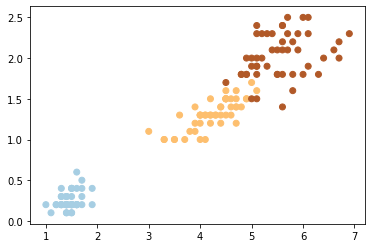

In [49]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap='Paired')

### step1.開一台空白函數學習機

In [50]:
from sklearn.svm import SVC

In [51]:
clf = SVC(gamma='auto')

### step2.訓練

In [52]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### step3.預測

In [53]:
y_predict = clf.predict(x_test)

In [56]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [57]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [58]:
y_predict - y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

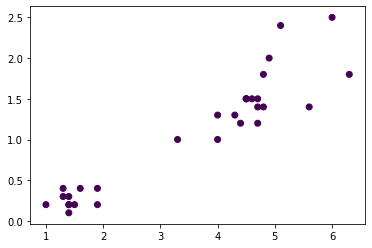

In [55]:
plt.scatter(x_test[:,0],x_test[:,1], c=y_predict-y_test)

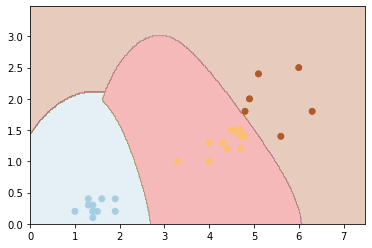

In [61]:
x0 = np.arange(0,7.5,0.02)
y0 = np.arange(0,3.5,0.02)

xm, ym = np.meshgrid(x0,y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap='Paired', alpha=0.3)

plt.scatter(x_test[:,0], x_test[:,1], cmap='Paired', c=y_test)